In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./mymoviedb.csv")
df.head()


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,15-12-2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,01-03-2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,25-02-2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,24-11-2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,22-12-2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...



Here's the text from the image, formatted for chat:

Exploration Summary
We have a dataframe consisting of 9827 rows and 9 columns.   
Our dataset looks a bit tidy with no NANs nor duplicated values.  
Release_Date column needs to be casted into date time and to extract only the year value.  
Overview, Original_Language and Poster-Url wouldn't be so useful during analysis, so we'll drop them.   
There is noticeable outliers in Popularity column.    
Vote_Average better be categorised for proper analysis.   
Genre column has comma separated values and white spaces that needs to be handled and casted into category.   

In [4]:

df.drop(index = range(1106, 1116), inplace = True)


In [5]:
df["Release_Date"] = pd.to_datetime(df["Release_Date"], dayfirst=True)

In [6]:
print(df["Release_Date"].dtype)

datetime64[ns]


In [7]:
df["Release_Date"] = df["Release_Date"].dt.year


In [8]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [9]:
df.drop(columns=['Overview', 'Original_Language', 'Poster_Url'], axis = 1, inplace = True)

In [10]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7,"Action, Adventure, Thriller, War"


"categorizing Vote_Average column  
  
We would cut the Vote_Average values and make 4 categories: popular, average, below_avg, not_popular to describe it more using catigorize_col() function provided above."

df.info()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9827 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Release_Date  9827 non-null   int32  
 1   Title         9827 non-null   object 
 2   Popularity    9826 non-null   float64
 3   Vote_Count    9826 non-null   object 
 4   Vote_Average  9826 non-null   object 
 5   Genre         9826 non-null   object 
dtypes: float64(1), int32(1), object(4)
memory usage: 499.0+ KB


In [12]:
df.describe()

,Release_Date,Popularity
count,9827.000000,9826.000000
mean,2006.203623,40.323951
std,15.685554,108.879332
min,1902.000000,13.354000
25%,2000.000000,16.128250
50%,2011.000000,21.195000
75%,2017.000000,35.179250
max,2024.000000,5083.954000


In [13]:
df["Vote_Average"] = pd.to_numeric(df["Vote_Average"])

In [14]:
df["Vote_Average"].describe()['25%']

5.9

In [15]:
def categorize(df, col, label):

    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max'],
    ]

    df[col] = pd.cut(df[col], edges, labels = label, duplicates = 'drop')

    return df

In [16]:
categorize(df, "Vote_Average", ['not popular', 'below average', 'average', 'popular'])

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below average,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9832,1973,Badlands,13.357,896,popular,"Drama, Crime"
9833,2020,Violent Delights,13.356,8,not popular,Horror
9834,2016,The Offering,13.355,94,not popular,"Mystery, Thriller, Horror"
9835,2021,The United States vs. Billie Holiday,13.354,152,average,"Music, Drama, History"


In [17]:
df["Vote_Average"].value_counts()

Vote_Average
not popular      2467
popular          2450
average          2411
below average    2398
Name: count, dtype: int64

In [18]:
df.dropna(inplace = True)
df.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [19]:
df["Genre"] = df["Genre"].str.split(", ")

In [20]:
df = df.explode("Genre").reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [21]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [22]:
df.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

#### 1) What is the most frequent genre of movies released on Netflix ?

In [23]:
sns.set_style("whitegrid")
df["Genre"].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

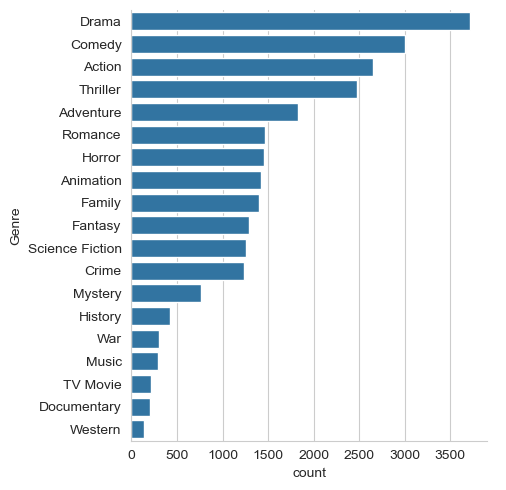

In [24]:
sns.catplot(y="Genre", data = df, kind = "count", order = df["Genre"].value_counts().index)
plt.show()

#### 2) Which has the highest votes in vote avg column ?

Text(0.5, 1.0, 'vote average')

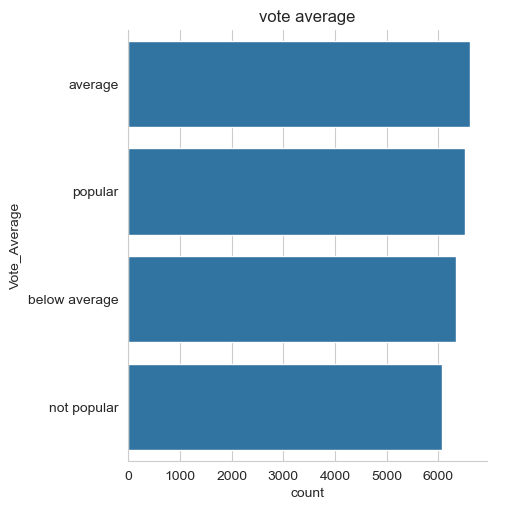

In [25]:
sns.catplot(y= "Vote_Average", data = df, kind= "count",order = df["Vote_Average"].value_counts().index)
plt.title("vote average")

#### 3)What movie got highest popularity ? and what is its genre ?

In [26]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


#### 4) Which movie has least Popularity? What is its Genre ?

In [27]:
df[df["Popularity"] == df["Popularity"].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152,average,History
25548,1984,Threads,13.354,186,popular,War
25549,1984,Threads,13.354,186,popular,Drama
25550,1984,Threads,13.354,186,popular,Science Fiction


#### 5) Which year has most filmed movies ?

Text(0, 0.5, 'Number of Movies')

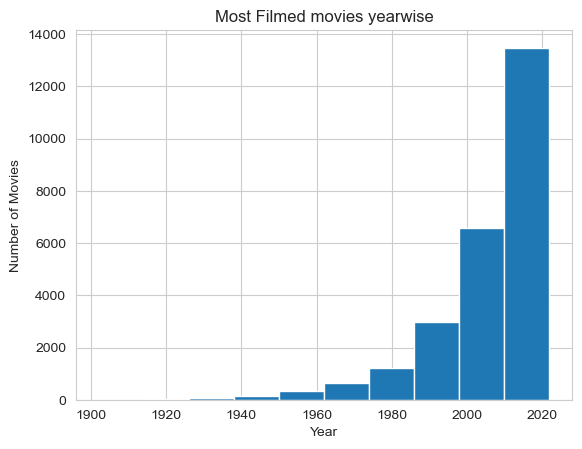

In [29]:
df["Release_Date"].hist()
plt.title("Most Filmed movies yearwise")

plt.xlabel("Year")
plt.ylabel("Number of Movies")